In [14]:
#Setup code
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns
import numpy as np

In [15]:
df=pd.read_csv('top50.csv',encoding='latin-1')
df.head()


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [ ]:
#data analysis

In [16]:
df.shape

(50, 14)

In [17]:
#check null
df.isnull().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [18]:
#drop columns that do not need
df=df.drop(columns=['Unnamed: 0','Track.Name','Artist.Name','Popularity'])


In [19]:
df.head()

,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,canadian pop,117,55,76,-6,8,75,191,4,3
1,reggaeton flow,105,81,79,-4,8,61,302,8,9
2,dance pop,190,80,40,-4,16,70,186,12,46
3,pop,93,65,64,-8,8,55,198,12,19
4,dfw rap,150,65,58,-4,11,18,175,45,7


In [20]:
num_data = df._get_numeric_data()

In [21]:
num_data.head()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,117,55,76,-6,8,75,191,4,3
1,105,81,79,-4,8,61,302,8,9
2,190,80,40,-4,16,70,186,12,46
3,93,65,64,-8,8,55,198,12,19
4,150,65,58,-4,11,18,175,45,7


In [22]:
num_data.describe()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
count,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,120.060000,64.060000,71.38000,-5.660000,14.660000,54.600000,200.960000,22.160000,12.480000
std,30.898392,14.231913,11.92988,2.056448,11.118306,22.336024,39.143879,18.995553,11.161596
min,85.000000,32.000000,29.00000,-11.000000,5.000000,10.000000,115.000000,1.000000,3.000000
25%,96.000000,55.250000,67.00000,-6.750000,8.000000,38.250000,176.750000,8.250000,5.000000
50%,104.500000,66.500000,73.50000,-6.000000,11.000000,55.500000,198.000000,15.000000,7.000000
75%,137.500000,74.750000,79.75000,-4.000000,15.750000,69.500000,217.500000,33.750000,15.000000
max,190.000000,88.000000,90.00000,-2.000000,58.000000,95.000000,309.000000,75.000000,46.000000


In [23]:
#check number of values in each genre
df['Genre'].value_counts()


dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
panamanian pop      2
reggaeton flow      2
country rap         2
brostep             2
reggaeton           2
electropop          2
canadian pop        2
dfw rap             2
big room            1
r&b en espanol      1
australian pop      1
trap music          1
boy band            1
atl hip hop         1
pop house           1
escape room         1
Name: Genre, dtype: int64

Text(0, 0.5, 'Count')

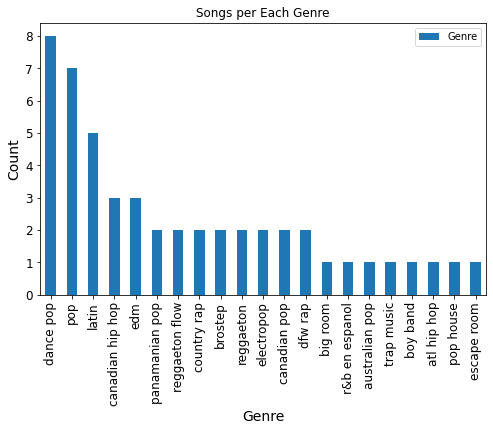

In [24]:
pd.DataFrame(df['Genre'].value_counts())
ax = pd.DataFrame(df['Genre'].value_counts()).plot(kind='bar',figsize=(8,5))
ax.set_title('Songs per Each Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Count')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


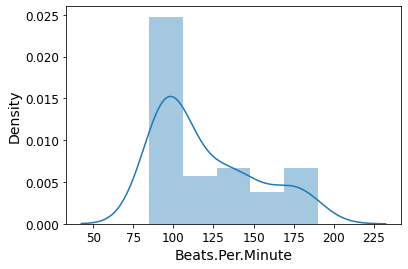

In [193]:
sns.distplot(df['Beats.Per.Minute'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


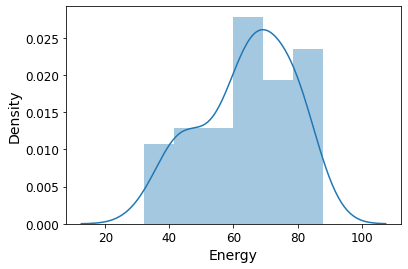

In [29]:
sns.distplot(df['Energy'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


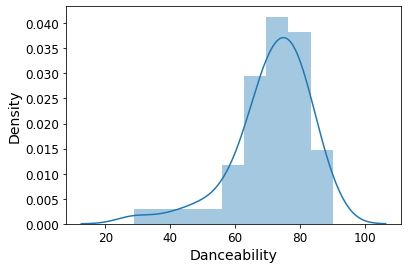

In [30]:
sns.distplot(df['Danceability'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


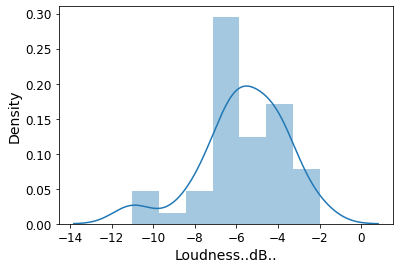

In [31]:
sns.distplot(df['Loudness..dB..'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


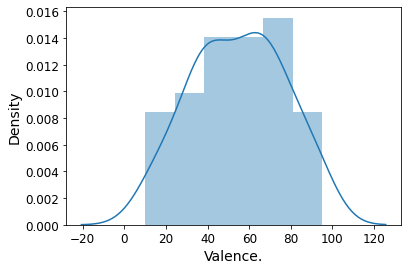

In [34]:
sns.distplot(df['Valence.'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


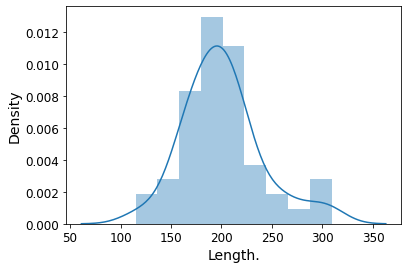

In [35]:
sns.distplot(df['Length.'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


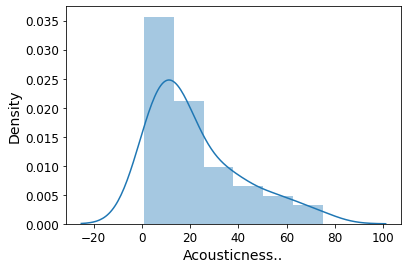

In [36]:
sns.distplot(df['Acousticness..'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


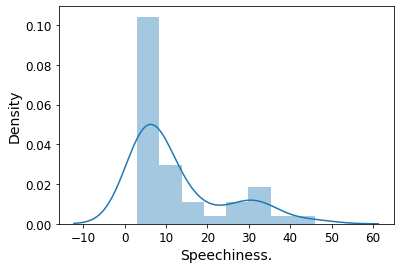

In [37]:
sns.distplot(df['Speechiness.'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


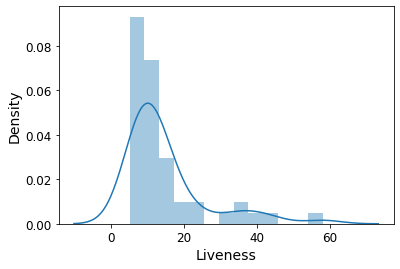

In [195]:
sns.distplot(df['Liveness'])

In [38]:
#Correlation analysis
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
df['Genre']=LabelEncoder().fit_transform(df['Genre'])
corr=df.corr()
corr

,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
Genre,1.000000,0.206085,0.246538,-0.053592,0.098775,-0.196011,0.148196,0.248499,-0.081044,0.260325
Beats.Per.Minute,0.206085,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052
Energy,0.246538,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860
Danceability,-0.053592,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472
Loudness..dB..,0.098775,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213
Liveness,-0.196011,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286
Valence.,0.148196,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242
Length.,0.248499,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755
Acousticness..,-0.081044,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293
Speechiness.,0.260325,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000


In [39]:
corr['Genre']

Genre               1.000000
Beats.Per.Minute    0.206085
Energy              0.246538
Danceability       -0.053592
Loudness..dB..      0.098775
Liveness           -0.196011
Valence.            0.148196
Length.             0.248499
Acousticness..     -0.081044
Speechiness.        0.260325
Name: Genre, dtype: float64

In [146]:
#select features
features = df.drop(columns=['Danceability','Loudness..dB..','Acousticness..','Genre'],axis=1)

In [147]:
features.head()

,Beats.Per.Minute,Energy,Liveness,Valence.,Length.,Speechiness.
0,117,55,8,75,191,3
1,105,81,8,61,302,9
2,190,80,16,70,186,46
3,93,65,8,55,198,19
4,150,65,11,18,175,7


In [148]:
label =df['Genre']

In [ ]:
label

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score

In [183]:
X_train,X_test,y_train,y_test = train_test_split(features, label, train_size=0.8, test_size=0.2, random_state=20)

In [184]:
#randomforest classification
Fr_clf=RandomForestClassifier(n_estimators=100,random_state=20)
Fr_clf.fit(X_train,y_train)
pred_Fr=Fr_clf.predict(X_test)
pred_Fr

array([ 5,  0,  0, 16,  8, 15, 15, 11,  8, 10])

In [185]:
from sklearn.metrics import f1_score,accuracy_score
f1_score(y_test,pred_Fr,average='weighted')

0.1

In [186]:
accuracy_score(y_test,pred_Fr)

0.1

In [187]:
#svm classification
svm_clf=svm.SVC(kernel='linear')
svm_clf.fit(X_train,y_train)
pred_svm=svm_clf.predict(X_test)
pred_svm

array([ 5,  0, 12, 16,  1, 19,  3, 11, 15, 10])

In [188]:
f1_score(y_test,pred_svm,average='weighted')

0.2

In [189]:
accuracy_score(y_test,pred_svm)

0.2

In [190]:
#decisiontree classification
dec_clf=DecisionTreeClassifier(random_state=20,min_samples_split=2,min_samples_leaf=2)
dec_clf.fit(X_train,y_train)
pred_dec=dec_clf.predict(X_test)
pred_dec

array([ 5,  0,  8,  2,  3, 15, 13,  8, 13,  6])

In [191]:
f1_score(y_test,pred_dec,average='weighted')

0.0

In [192]:
accuracy_score(y_test,pred_dec)

0.0